In [ ]:
# in this notebook varya is trying to export the median point (from the precipitation) from HMA - regions 
# to a dataframe and then later csv file to use as a forsing for testrun of sedcas model 

# take the locations determined in a different notebook (also stored in some csv file already)
# loop through every file that is in the folder on the server:
#    find location. select data 
#    

# find that location in the HMA climate from the server 
# convert to csv 
# save 


In [1]:
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import geopandas as gpd
import os
import glob

from datetime import datetime


%matplotlib inline

## workapathround (make netcdf conversion to df faster): 

### (this is an important part) 

### locations from csv and .shp file

In [2]:
# read locations file - for annual sum precipitations: 
locations_pr = pd.read_table('out/median_annual_precip_regions.csv', sep = ',',index_col =0)

# read locations file - for annial median temp:
locations_t2m = pd.read_table('out/annual_median_t2m_regions.csv', sep = ',', index_col = 0)

# read hma polygons file to a df:
hma = gpd.read_file('HMA_regions/HMA_regions.shp')
hma_df = pd.DataFrame(hma) 

### path to folders and output to where save data 

In [3]:
path_temp = '/Volumes/Data/Repository/external_data/ERA5/HMA/netcdf/hourly/2m-temperature/'

# precipitations
path_precip = '/Volumes/Data/Repository/external_data/ERA5/HMA/netcdf/hourly/total-precipitation/'

# total cloud cover 
path_clouds = '/Volumes/Data/Repository/external_data/ERA5/HMA/netcdf/hourly/total-cloud-cover/'

# incoming radiation 
path_radiation = '/Volumes/Data/Repository/external_data/ERA5/HMA/netcdf/hourly/surface-solar-radiation-downwards/'


# path for output timeseries
path_output = "/Users/varyabazilova/Desktop/hma_regions/out/timeseries"


### what mountain range are we looking at? 


In [4]:
# take the n index of the "locations precipitation" table 

n = 13
print('name of mnt range:', hma_df.Name[n])

point_lat = locations_pr.latitude[n]
point_lon = locations_pr.longitude[n]

# print(datetime.now())

name of mnt range: Tibetan Interior Mountains


### loop: get the csv for selected point (one mnt range) for each parameter 

In [ ]:
'''%%time

# temperatures

print('started at:', datetime.now())

for n, f in enumerate(os.listdir(path_temp)):
    # read every file
    ds = xr.open_dataset(os.path.join(path_temp, f), decode_coords="all")
    # select coordinates: 
    ds = ds.sel(latitude = point_lat, longitude = point_lon, method = 'nearest')
    # kick out the expver dimention
    # ds = ds.sel(expver= slice(0, 1))
    # ds = ds.squeeze()
    ds = ds.drop(labels = ['longitude', 'latitude']).squeeze()
    
    # check:
    print('ready to turn into df at:', datetime.now())
    
    # convert to dataframe
    ds_df = ds.to_dataframe().dropna()#.drop_duplicates()
    
    # export:
    # 1. create a year 
    year = n + 1979
    # 2. save to csv
    # ds_df.to_csv(path_output + '_temp_{y}.csv'.format(y=year))
    ds_df.to_csv('/Users/varyabazilova/Desktop/hma_regions/out/timeseries/13_Tibetan_Interior_Mountains/' + 'timeseries_temp_{y}.csv'.format(y=year))

    
    print('year - done:', year)
    print('done at:', datetime.now())
    '''


In [ ]:
#### test cell to see what am i doing wrong :/ 
'''
%%time 
preciptest = xr.open_dataset('/Volumes/Data/Repository/external_data/ERA5/HMA/netcdf/hourly/total-precipitation/era5_total-precipitation_hourly_1979.nc')
# preciptest2 = xr.open_dataset('/Volumes/Data/Repository/external_data/ERA5/HMA/netcdf/hourly/total-precipitation/era5_total-precipitation_hourly_1980.nc')


# ds = xr.open_dataset(os.path.join(path_temp, f), decode_coords="all")
    # select coordinates: 
ds = preciptest.sel(latitude = point_lat, longitude = point_lon, method = 'nearest')
    # kick out the expver dimention
    # ds = ds.sel(expver= slice(0, 1))
    # ds = ds.squeeze()
ds = ds.drop(labels = ['longitude', 'latitude']).squeeze()
    
print('ready to turn into df at:', datetime.now())
    
    # convert to dataframe
ds_df = ds.to_dataframe().dropna().drop_duplicates()
'''



In [ ]:
# ds_df = ds_df.reset_index()#.time.values

# for x in preciptest.time.values:
    # print(x)

In [ ]:
# ds_df = ds_df.sort_values('time') 
# for x in ds_df.time.values:
    # print(x)

In [8]:
'''%%time

# precipitation 

print('started at:', datetime.now())

for n, f in enumerate(os.listdir(path_precip)):
    # read every file
    ds = xr.open_dataset(os.path.join(path_precip, f), decode_coords="all")
    # select coordinates: 
    ds = ds.sel(latitude = point_lat, longitude = point_lon, method = 'nearest')
    # kick out the expver dimention
    # ds = ds.sel(expver= slice(0, 1))
    # ds = ds.squeeze()
    ds = ds.drop(labels = ['longitude', 'latitude'])#.squeeze()
    
    # check:
    print('ready to turn into df at:', datetime.now())
    
    # convert to dataframe
    ds_df = ds.to_dataframe().dropna()#.drop_duplicates()
    
    # export:
    # 1. create a year 
    year = n + 1979
    # 2. save to csv
    # ds_df.to_csv(path_output + '_precip_{y}.csv'.format(y=year))
    ds_df.to_csv('/Users/varyabazilova/Desktop/hma_regions/out/timeseries/13_Tibetan_Interior_Mountains/' + 'timeseries_precip_{y}.csv'.format(y=year))


    print('year - done:', year)
    print('done at:', datetime.now())

'''



'%%time\n\n# precipitation \n\nprint(\'started at:\', datetime.now())\n\nfor n, f in enumerate(os.listdir(path_precip)):\n    # read every file\n    ds = xr.open_dataset(os.path.join(path_precip, f), decode_coords="all")\n    # select coordinates: \n    ds = ds.sel(latitude = point_lat, longitude = point_lon, method = \'nearest\')\n    # kick out the expver dimention\n    # ds = ds.sel(expver= slice(0, 1))\n    # ds = ds.squeeze()\n    ds = ds.drop(labels = [\'longitude\', \'latitude\'])#.squeeze()\n    \n    # check:\n    print(\'ready to turn into df at:\', datetime.now())\n    \n    # convert to dataframe\n    ds_df = ds.to_dataframe().dropna()#.drop_duplicates()\n    \n    # export:\n    # 1. create a year \n    year = n + 1979\n    # 2. save to csv\n    # ds_df.to_csv(path_output + \'_precip_{y}.csv\'.format(y=year))\n    ds_df.to_csv(\'/Users/varyabazilova/Desktop/hma_regions/out/timeseries/13_Tibetan_Interior_Mountains/\' + \'timeseries_precip_{y}.csv\'.format(y=year))\n\n\n    

In [9]:
'''%%time

# clouds 

print('started at:', datetime.now())

for n, f in enumerate(os.listdir(path_clouds)):
    # read every file
    ds = xr.open_dataset(os.path.join(path_clouds, f), decode_coords="all")
    # select coordinates: 
    ds = ds.sel(latitude = point_lat, longitude = point_lon, method = 'nearest')
    # kick out the expver dimention
    # ds = ds.sel(expver= slice(0, 1))
    # ds = ds.squeeze()
    ds = ds.drop(labels = ['longitude', 'latitude']).squeeze()
    
    # check:
    print('ready to turn into df at:', datetime.now())
    
    # convert to dataframe
    ds_df = ds.to_dataframe().dropna()#.drop_duplicates()
    
    # export:
    # 1. create a year 
    year = n + 1979
    # 2. save to csv
    # ds_df.to_csv(path_output + '_cloud_cover_{y}.csv'.format(y=year))
    ds_df.to_csv('/Users/varyabazilova/Desktop/hma_regions/out/timeseries/13_Tibetan_Interior_Mountains/' + 'timeseries_clouds_{y}.csv'.format(y=year))

    print('year - done:', year)
    print('done at:', datetime.now())
    
'''



'%%time\n\n# clouds \n\nprint(\'started at:\', datetime.now())\n\nfor n, f in enumerate(os.listdir(path_clouds)):\n    # read every file\n    ds = xr.open_dataset(os.path.join(path_clouds, f), decode_coords="all")\n    # select coordinates: \n    ds = ds.sel(latitude = point_lat, longitude = point_lon, method = \'nearest\')\n    # kick out the expver dimention\n    # ds = ds.sel(expver= slice(0, 1))\n    # ds = ds.squeeze()\n    ds = ds.drop(labels = [\'longitude\', \'latitude\']).squeeze()\n    \n    # check:\n    print(\'ready to turn into df at:\', datetime.now())\n    \n    # convert to dataframe\n    ds_df = ds.to_dataframe().dropna()#.drop_duplicates()\n    \n    # export:\n    # 1. create a year \n    year = n + 1979\n    # 2. save to csv\n    # ds_df.to_csv(path_output + \'_cloud_cover_{y}.csv\'.format(y=year))\n    ds_df.to_csv(\'/Users/varyabazilova/Desktop/hma_regions/out/timeseries/13_Tibetan_Interior_Mountains/\' + \'timeseries_clouds_{y}.csv\'.format(y=year))\n\n    print

In [10]:
'''%%time

# radiation 

print('started at:', datetime.now())

for n, f in enumerate(os.listdir(path_radiation)):
    # read every file
    ds = xr.open_dataset(os.path.join(path_radiation, f), decode_coords="all")
    # select coordinates: 
    ds = ds.sel(latitude = point_lat, longitude = point_lon, method = 'nearest')
    # kick out the expver dimention
    # ds = ds.sel(expver= slice(0, 1))
    # ds = ds.squeeze()
    ds = ds.drop(labels = ['longitude', 'latitude']).squeeze()
    
    # check:
    print('ready to turn into df at:', datetime.now())
    
    # convert to dataframe
    ds_df = ds.to_dataframe().dropna()#.drop_duplicates()
    
    # export:
    # 1. create a year 
    year = n + 1979
    # 2. save to csv
    # ds_df.to_csv(path_output + '_SWradiation_{y}.csv'.format(y=year))
    ds_df.to_csv('/Users/varyabazilova/Desktop/hma_regions/out/timeseries/13_Tibetan_Interior_Mountains/' + 'timeseries_radiation_{y}.csv'.format(y=year))


    print('year - done:', year)
    print('done at:', datetime.now())

'''

'%%time\n\n# radiation \n\nprint(\'started at:\', datetime.now())\n\nfor n, f in enumerate(os.listdir(path_radiation)):\n    # read every file\n    ds = xr.open_dataset(os.path.join(path_radiation, f), decode_coords="all")\n    # select coordinates: \n    ds = ds.sel(latitude = point_lat, longitude = point_lon, method = \'nearest\')\n    # kick out the expver dimention\n    # ds = ds.sel(expver= slice(0, 1))\n    # ds = ds.squeeze()\n    ds = ds.drop(labels = [\'longitude\', \'latitude\']).squeeze()\n    \n    # check:\n    print(\'ready to turn into df at:\', datetime.now())\n    \n    # convert to dataframe\n    ds_df = ds.to_dataframe().dropna()#.drop_duplicates()\n    \n    # export:\n    # 1. create a year \n    year = n + 1979\n    # 2. save to csv\n    # ds_df.to_csv(path_output + \'_SWradiation_{y}.csv\'.format(y=year))\n    ds_df.to_csv(\'/Users/varyabazilova/Desktop/hma_regions/out/timeseries/13_Tibetan_Interior_Mountains/\' + \'timeseries_radiation_{y}.csv\'.format(y=year))\

### read created .csv-s and attach them together (separately for each variable) 

In [11]:
# region #1 temperatures 

# files = glob.glob('/Users/varyabazilova/Desktop/hma_regions/out/timeseries/1_Western_Himalaya/temp/*.csv')
files = glob.glob('/Users/varyabazilova/Desktop/hma_regions/out/timeseries/13_Tibetan_Interior_Mountains/temp/*.csv')


df_all = []

for f in files:
    df = pd.read_csv(f, sep = ',')
    df_all.append(df)

temps_region1 = pd.concat(df_all).sort_values('time').drop('expver', axis=1).set_index('time')
# temps_region1.to_csv('/Users/varyabazilova/Desktop/hma_regions/out/timeseries/13_Tibetan_Interior_Mountains/temps_1979_2020.csv')


In [12]:
# region #1 precipitation 

# files = glob.glob('/Users/varyabazilova/Desktop/hma_regions/out/timeseries/1_Western_Himalaya/precip/*.csv')
files = glob.glob('/Users/varyabazilova/Desktop/hma_regions/out/timeseries/13_Tibetan_Interior_Mountains/precip/*.csv')

df_all = []

for f in files:
    df = pd.read_csv(f, sep = ',')
    df_all.append(df)

precip_region1 = pd.concat(df_all).sort_values('time').drop('expver', axis=1).set_index('time')
# precip_region1.to_csv('/Users/varyabazilova/Desktop/hma_regions/out/timeseries/13_Tibetan_Interior_Mountains/precip_1979_2020.csv')



In [13]:
# region #1 clouds 

# files = glob.glob('/Users/varyabazilova/Desktop/hma_regions/out/timeseries/1_Western_Himalaya/clouds/*.csv')
files = glob.glob('/Users/varyabazilova/Desktop/hma_regions/out/timeseries/13_Tibetan_Interior_Mountains/clouds/*.csv')

df_all = []

for f in files:
    df = pd.read_csv(f, sep = ',')
    df_all.append(df)

clouds_region1 = pd.concat(df_all).sort_values('time').drop('expver', axis=1).set_index('time')
# clouds_region1.to_csv('/Users/varyabazilova/Desktop/hma_regions/out/timeseries/13_Tibetan_Interior_Mountains/clouds_1979_2020.csv')



In [15]:
# region #1 radiation 

# files = glob.glob('/Users/varyabazilova/Desktop/hma_regions/out/timeseries/1_Western_Himalaya/radiation/*.csv')
files = glob.glob('/Users/varyabazilova/Desktop/hma_regions/out/timeseries/13_Tibetan_Interior_Mountains/radiation/*.csv')

df_all = []

for f in files:
    df = pd.read_csv(f, sep = ',')
    df_all.append(df)

swradiation_region1 = pd.concat(df_all).sort_values('time').drop('expver', axis=1).set_index('time')
# swradiation_region1.to_csv('/Users/varyabazilova/Desktop/hma_regions/out/timeseries/13_Tibetan_Interior_Mountains/SWradiation_1979_2020.csv')



### merge all variables together using 'time' as key 


In [30]:
# sample climate data - how it all is supposed to look like:

sampleclimate = pd.read_csv('/Users/varyabazilova/Desktop/hma_regions/out/timeseries/1_Western_Himalaya/sample_climate.met', sep = '\t')
# sampleclimate

In [16]:
# read all 
path = '/Users/varyabazilova/Desktop/hma_regions/out/timeseries/13_Tibetan_Interior_Mountains'

temps = pd.read_csv(path + '/temps_1979_2020.csv', index_col = 0)
precip = pd.read_csv(path + '/precip_1979_2020.csv', index_col = 0)
clouds = pd.read_csv(path + '/clouds_1979_2020.csv', index_col = 0)
radiation = pd.read_csv(path + '/SWradiation_1979_2020.csv', index_col = 0)

# slice data so it starts and ends at the same time
start = '1980-01-01 00:00:00' 
end = '2019-01-01 00:00:00'

temps = temps.loc[start:end,:]
precip = precip.loc[start:end,:]
clouds = clouds.loc[start:end,:]
radiation = radiation.loc[start:end,:]

In [17]:
print('temps length:', len(temps)) 
print('precip length:', len(precip)) 
print('clouds length:', len(clouds)) 
print('radiation length:', len(radiation))


temps length: 341881
precip length: 341881
clouds length: 341881
radiation length: 341881


In [18]:
# clouds = clouds.reset_index().drop_duplicates()
# clouds = clouds.set_index('time')

In [19]:
print('new length clouds:', len(clouds))

new length clouds: 341881


In [20]:
# ----- merge together:

allstuff = temps.join([precip, radiation, clouds])

# ----- convert units: 

#convert temperature K to C
allstuff['t2m']=allstuff.t2m-273.15
# precipotation m to mm 
allstuff['tp']=allstuff.tp * 1000
# radiation j/m2 to w/m2
# SSR [W/m2] = SSR [J/m^2] / (3600 seconds)
allstuff['ssrd'] = allstuff.ssrd / 3600


<AxesSubplot:xlabel='time'>

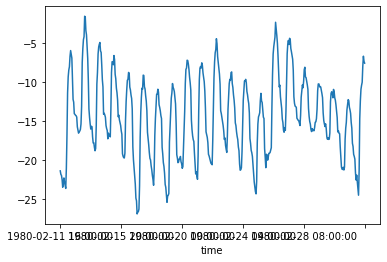

In [25]:
# allstuff.head()
# allstuff[1000:1500].t2m.plot()

In [26]:
# rename columns: 

allstuff = allstuff.reset_index()

In [27]:
allstuff = allstuff.rename(columns={'time': 'D', 't2m':'Ta', 'tp':'Pr', 'tcc':'N', 'ssrd':'Rsw'})


In [28]:
allstuff.head()

,D,Ta,Pr,Rsw,N
0,1980-01-01 00:00:00,-24.34229,0.035096,0.000000,0.745640
1,1980-01-01 01:00:00,-24.72170,0.002289,0.000000,0.977385
2,1980-01-01 02:00:00,-24.64997,0.000764,13.677778,1.000000
3,1980-01-01 03:00:00,-23.77958,0.000000,158.060556,1.000000
4,1980-01-01 04:00:00,-18.70550,0.000000,338.643889,1.000000


In [31]:
sampleclimate.head()

,D,Pr,Ta,Rsw,N
0,1999-10-01 00:00:00,0.0,5.6,1.0,NaN
1,1999-10-01 01:00:00,0.0,5.5,2.0,NaN
2,1999-10-01 02:00:00,0.0,5.7,1.0,NaN
3,1999-10-01 03:00:00,0.4,5.7,0.0,NaN
4,1999-10-01 04:00:00,0.1,5.7,0.0,NaN


### save output! 

In [32]:
# allstuff.to_csv('/Users/varyabazilova/Desktop/hma_regions/out/timeseries/13_Tibetan_Interior_Mountains/climate.met', sep = '\t', index = False)